In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,BatchNormalization,Dropout,MaxPool2D
from tensorflow.keras.utils import to_categorical,normalize
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import sklearn as sk
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train=pd.read_csv('Downloads/Datascience/KaggleStuff/MNIST_Competition/train.csv')
test=pd.read_csv('Downloads/Datascience/KaggleStuff/MNIST_Competition/test.csv')

In [3]:
Train_raw=train.to_numpy()
Test_raw=test.to_numpy()

In [4]:
Train_raw_shape=Train_raw.shape
Test_raw_shape=Test_raw.shape
print(Train_raw_shape,Test_raw_shape)

(42000, 785) (28000, 784)


In [5]:
print(28*28)

784


In [6]:
y=Train_raw[:,0]
X_raw=Train_raw[:,1:]
X_raw_shape=np.shape(X_raw)
print(X_raw_shape)

(42000, 784)


In [7]:
print(y[:10])

[1 0 1 4 0 0 7 3 5 3]


In [8]:
X=np.reshape(X_raw,newshape=(X_raw_shape[0],28,28))
T=np.reshape(Test_raw,newshape=(Test_raw_shape[0],28,28))

In [9]:
print(X.shape,T.shape)

(42000, 28, 28) (28000, 28, 28)


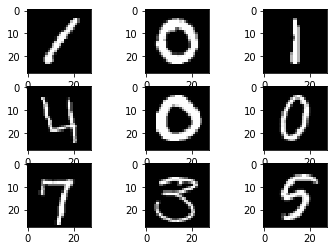

In [10]:
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(X[i],cmap=plt.get_cmap('gray'))
    plt.show

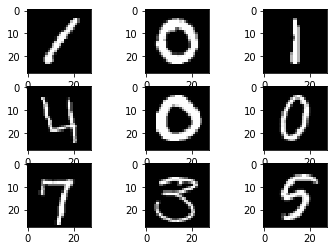

In [11]:
for i in range(9):
    plt.subplot(3,3,1+i)   ##Its same as 331. Either 331 or 3,3,1 works the same. Note:i=0 at first
    plt.imshow(X[i],cmap=plt.get_cmap('gray'))
    plt.show

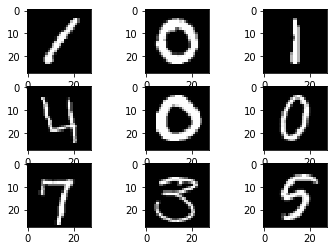

In [12]:
for i in range(1,10):
    plt.subplot(3,3,i)   ##Its same as 331. Either 331 or 3,3,1 works the same
    plt.imshow(X[i-1],cmap=plt.get_cmap('gray'))
    plt.show

<function matplotlib.pyplot.show(*args, **kw)>

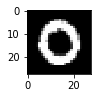

In [13]:
plt.subplot(3,3,1)   ##Its same as 331. Either 331 or 3,3,1 works the same
plt.imshow(X[1],cmap=plt.get_cmap('gray'))
plt.show

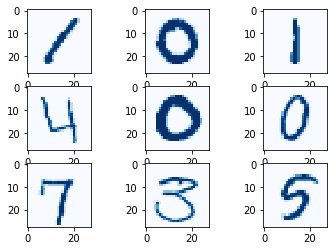

In [14]:

for i in range(9):
    plt.subplot(331+i)
    plt.imshow(X[i],cmap=plt.get_cmap('Blues'))
    plt.show

In [15]:
X=np.reshape(X,newshape=(np.shape(X)[0],28,28,1))
T=np.reshape(T,newshape=(np.shape(T)[0],28,28,1))
print(np.shape(X))
print(np.shape(T))

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [16]:
y=to_categorical(y)
print(np.shape(y))
X=X.astype('float32')
y=y.astype('float32')
T=T.astype('float32')
X=X/255.0
T=T/255.0
X=normalize(X,axis=(1,2),order=1)
T=normalize(T,axis=(1,2),order=1)

(42000, 10)


In [17]:
def ModelDefinition():
    model=Sequential()
    model.add(Conv2D(filters=64,kernel_size=7,activation='relu',padding='same',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=4,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2),strides=2))
    model.add(Dropout(0.25)) 
    
    model.add(Conv2D(filters=64,kernel_size=4,padding='same',activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(units=10,activation='softmax'))
    opt=Adam(learning_rate=0.001)
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5,min_lr=0.00001)
    model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'],callbacks=[learning_rate_reduction])

    
    return model

In [18]:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        shear_range=0.1,
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    datagen.fit(X)

In [19]:
batch_size=32
model=ModelDefinition()
history = model.fit_generator(datagen.flow(X,y, batch_size=batch_size),steps_per_epoch=X.shape[0] // batch_size+1,epochs = 50)

Epoch 1/50
1313/1313 [==============================] - 712s 542ms/step - loss: 0.4215 - accuracy: 0.8681
Epoch 2/50
1313/1313 [==============================] - 706s 538ms/step - loss: 0.1548 - accuracy: 0.9521
Epoch 3/50
1313/1313 [==============================] - 706s 538ms/step - loss: 0.1247 - accuracy: 0.9618
Epoch 4/50
1313/1313 [==============================] - 708s 539ms/step - loss: 0.1079 - accuracy: 0.9665
Epoch 5/50
1313/1313 [==============================] - 709s 540ms/step - loss: 0.0957 - accuracy: 0.9706
Epoch 6/50
1313/1313 [==============================] - 716s 545ms/step - loss: 0.0912 - accuracy: 0.9723
Epoch 7/50
1313/1313 [==============================] - 716s 545ms/step - loss: 0.0834 - accuracy: 0.9746
Epoch 8/50
1313/1313 [==============================] - 715s 545ms/step - loss: 0.0739 - accuracy: 0.9781
Epoch 9/50
1313/1313 [==============================] - 714s 543ms/step - loss: 0.0742 - accuracy: 0.9778
Epoch 10/50
1313/1313 [=======================

In [20]:
initial_weights=model.get_weights()

In [21]:
Prediction=model.predict_classes(T)

In [22]:
print(Prediction)

[2 0 9 ... 3 9 2]


In [23]:

prediction_dict={'ImageId':[i+1 for i in range(len(Prediction))],'Label':Prediction}
prediction_df=pd.DataFrame(prediction_dict)
prediction_df.to_csv('Downloads/Datascience/KaggleStuff/MNIST_prediction.csv',index=False)